In [61]:
from Model import STGEmbModel
import torch
from torch import nn
model = STGEmbModel(input_dim=512, output_dim=128, hidden_dims=[512, 256], lam=0.1)
model.train()
x1 = torch.ones(100, 256)
x2 = torch.zeros(100, 256)
x = torch.cat([x1, x2], dim=1)
x = x.requires_grad_()
print(x.shape)
y = torch.zeros(100, 128, requires_grad=True)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-3)
criterion = nn.MSELoss()
init_mu = model.get_mu()



torch.Size([100, 512])


In [62]:
for name, param in  model.named_parameters():
    print(name)

mu
mlp.mlp.0.0.weight
mlp.mlp.0.0.bias
mlp.mlp.1.0.weight
mlp.mlp.1.0.bias
mlp.mlp.2.weight
mlp.mlp.2.bias


<AxesSubplot:>

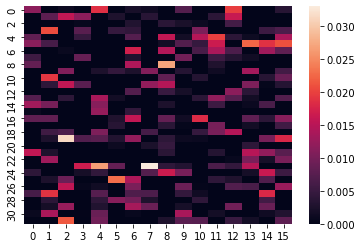

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
z = np.maximum(np.minimum(init_mu, 1), 0)
sns.heatmap(z.reshape(32, 16), vmin=0)

In [64]:
for epoch in range(5):
    optimizer.zero_grad()
    out = model(x)
    loss = criterion(y, out)
    reg = model.get_reg_loss()
    total_loss = loss + reg
    total_loss.backward()
    print(loss.item(), reg.item(), total_loss.item())
    optimizer.step()
end_mu =  model.get_mu()

0.0028411359526216984 0.06911884248256683 0.0719599798321724
0.001597705646418035 0.06908486038446426 0.07068256288766861
0.0012794827343896031 0.0690503641963005 0.07032984495162964
0.0007769890944473445 0.06901586800813675 0.06979285925626755
0.0006133481510914862 0.06898131221532822 0.06959465891122818


<AxesSubplot:>

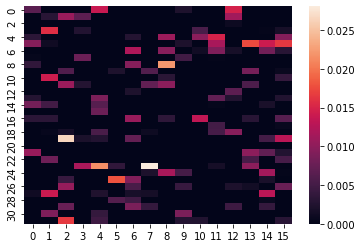

In [65]:
z_end = np.maximum(np.minimum(end_mu, 1), 0)
sns.heatmap(z_end.reshape(32, 16), vmin=0)

In [66]:
for epoch in range(10):
    optimizer.zero_grad()
    out = model(x)
    loss = criterion(y, out)
    reg = model.get_reg_loss()
    total_loss = loss + reg
    total_loss.backward()
    print(loss.item(), reg.item(), total_loss.item())
    optimizer.step()
end_mu =  model.get_mu()

0.0004617695230990648 0.0689467266201973 0.06940849870443344
0.0003669402503874153 0.06891211867332458 0.06927905976772308
0.0003258819633629173 0.06887752562761307 0.06920340657234192
0.0002757395268417895 0.06884296238422394 0.06911870092153549
0.00020373887673486024 0.0688084289431572 0.06901216506958008
0.00017629831563681364 0.06877398490905762 0.06895028054714203
0.00011442225513746962 0.06873960047960281 0.06885401904582977
9.782769484445453e-05 0.06870531290769577 0.06880313903093338
9.336558287031949e-05 0.06867113709449768 0.06876450031995773
9.678567585069686e-05 0.06863707304000854 0.06873385608196259


<AxesSubplot:>

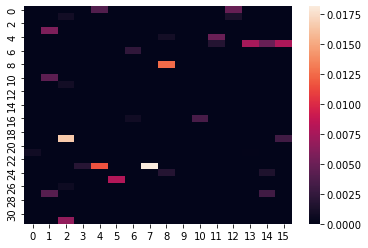

In [67]:
z_end = np.maximum(np.minimum(end_mu, 1), 0)
sns.heatmap(z_end.reshape(32, 16), vmin=0)